In [1]:
# Optimized code with comments
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Combined_Flights_2022.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Combined_Flights_2022.csv'

In [7]:
# Mapped columns based on your dataset
use_cols = [
    'Year',                     # Year
    'Month',                    # Month
    'DayofMonth',               # DayofMonth
    'DayOfWeek',                # DayOfWeek
    'DepTime',                  # DepTime
    'CRSDepTime',               # CRSDepTime
    'ArrTime',                  # ArrTime
    'CRSArrTime',               # CRSArrTime
    'Marketing_Airline_Network', # Marketing_Airline_Network
    'Flight_Number_Marketing_Airline', # Flight_Number_Marketing_Airline
    'Tail_Number',              # Tail_Number
    'ActualElapsedTime',        # ActualElapsedTime
    'CRSElapsedTime',           # CRSElapsedTime
    'AirTime',                  # AirTime
    'ArrDelay',                 # ArrDelay
    'DepDelay',                 # DepDelay
    'Origin',                   # Origin
    'Dest',                     # Dest
    'Distance',                 # Distance
    'TaxiIn',                   # TaxiIn
    'TaxiOut',                  # TaxiOut
    'Cancelled',                # Cancelled
    'Diverted',                 # Diverted
    # Note: CancellationCode, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay
    # are not present in your dataset, so these cannot be directly mapped and will need additional handling if required.
]

# Read the CSV file and select relevant columns, then sample 300,000 rows
df = pd.read_csv('Combined_Flights_2022.csv', usecols=use_cols).sample(300000, random_state=44)

# Display the first few rows of the DataFrame
df.head()


,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,...,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Flight_Number_Marketing_Airline,Tail_Number,TaxiOut,TaxiIn,CRSArrTime,ArrDelay
3901683,IAD,BUF,False,False,2227,2303.0,36.0,28.0,47.0,74.0,...,3,6,7,UA,686,N35204,19.0,19.0,2341,47.0
1330605,STL,ATL,False,False,2008,1956.0,-12.0,2235.0,70.0,98.0,...,7,11,1,F9,1586,N344FR,17.0,12.0,2246,-11.0
3695971,ORD,TPA,False,False,805,801.0,-4.0,1131.0,138.0,156.0,...,3,16,3,AA,2920,N992AN,8.0,4.0,1141,-10.0
1125669,LAX,COS,False,False,1839,1830.0,-9.0,2158.0,123.0,145.0,...,7,30,6,UA,5282,N457SW,16.0,9.0,2204,-6.0
2772738,PHL,EWR,False,False,601,845.0,164.0,1002.0,23.0,59.0,...,6,3,5,UA,3656,N724YX,33.0,21.0,700,182.0


In [8]:
# Print the shape of the DataFrame
print(df.shape)

# Display information about the DataFrame
df.info()

(300000, 23)
<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 3901683 to 1637906
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Origin                           300000 non-null  object 
 1   Dest                             300000 non-null  object 
 2   Cancelled                        300000 non-null  bool   
 3   Diverted                         300000 non-null  bool   
 4   CRSDepTime                       300000 non-null  int64  
 5   DepTime                          291111 non-null  float64
 6   DepDelay                         291104 non-null  float64
 7   ArrTime                          290809 non-null  float64
 8   AirTime                          290145 non-null  float64
 9   CRSElapsedTime                   300000 non-null  float64
 10  ActualElapsedTime                290145 non-null  float64
 11  Distance                         300000 non-null  

In [9]:
df.describe()

,CRSDepTime,DepTime,DepDelay,ArrTime,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Month,DayofMonth,DayOfWeek,Flight_Number_Marketing_Airline,TaxiOut,TaxiIn,CRSArrTime,ArrDelay
count,300000.000000,291111.000000,291104.000000,290809.000000,290145.000000,300000.000000,290145.000000,300000.000000,300000.0,300000.000000,300000.000000,300000.000000,300000.000000,290931.000000,290809.000000,300000.000000,290145.000000
mean,1328.688003,1333.709029,13.098123,1458.879099,110.750559,141.060980,135.596812,795.883487,2022.0,4.082343,15.711203,4.005807,2562.296033,16.984453,7.876372,1485.800473,7.528425
std,490.015590,505.024378,53.147000,541.309941,69.774736,71.602893,71.636499,590.118435,0.0,1.996461,8.761197,2.007512,1745.876347,9.500131,6.622054,517.224264,55.056690
min,1.000000,1.000000,-55.000000,1.000000,8.000000,22.000000,16.000000,31.000000,2022.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-76.000000
25%,912.000000,916.000000,-5.000000,1047.000000,60.000000,89.000000,83.000000,366.000000,2022.0,2.000000,8.000000,2.000000,1105.000000,11.000000,4.000000,1102.000000,-14.000000
50%,1320.000000,1325.000000,-2.000000,1500.000000,93.000000,124.000000,119.000000,641.000000,2022.0,4.000000,16.000000,4.000000,2227.000000,15.000000,6.000000,1512.000000,-5.000000
75%,1734.000000,1743.000000,11.000000,1913.000000,140.000000,171.000000,166.000000,1032.000000,2022.0,6.000000,23.000000,6.000000,3879.000000,19.000000,9.000000,1919.000000,10.000000
max,2359.000000,2400.000000,2994.000000,2400.000000,673.000000,690.000000,701.000000,5095.000000,2022.0,7.000000,31.000000,7.000000,9679.000000,171.000000,281.000000,2359.000000,2977.000000


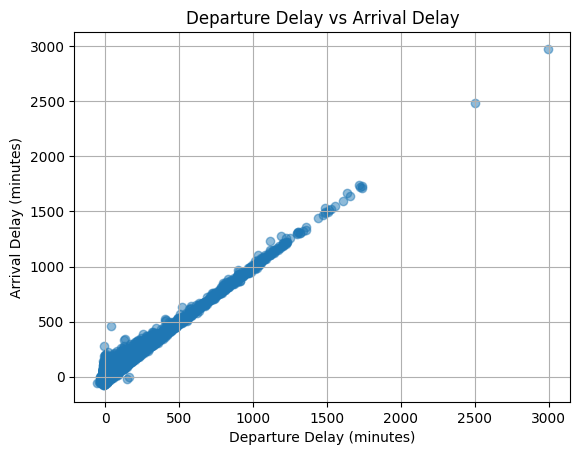

,DepDelay,ArrDelay
DepDelay,1.000000,0.968194
ArrDelay,0.968194,1.000000


In [10]:
import matplotlib.pyplot as plt

plt.scatter(df['DepDelay'], df['ArrDelay'], alpha=0.5)
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()
df[['DepDelay','ArrDelay']].corr()

### Cancellation Code Distribution:

In [11]:
airline_network_counts = df['Airline'].value_counts()

# Filtering out airline networks with less than 5% of total flights
threshold = 0.05 * df.shape[0]
airline_network_counts_filtered = airline_network_counts[airline_network_counts >= threshold]
other_flights_count = airline_network_counts[airline_network_counts < threshold].sum()
airline_network_counts_filtered['Other'] = other_flights_count

# Plotting a pie chart to visualize the distribution of flights among airline networks
plt.figure(figsize=(8, 8))
plt.pie(airline_network_counts_filtered, labels=airline_network_counts_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Flights Among Airline Networks')
plt.show()
df['Airline'].value_counts()

KeyError: 'CancellationCode'